In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/915ebe6f0e7302693bdd8eac985797dba1d25662/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [56]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

epsilon = 0.05;
cem_init_num_samples = 2000;
cem_init_num_elites = 200;
cem_init_iterations = 5;
test_data_name = "hotel_test.pkl";  
ado_vel_dict = Dict("Any" => MvNormal([0.0, 0.0], Diagonal([0.4, 0.4])));  
start_time_idx = 401;   
sim_horizon = 10.0;
prediction_mode = "gaussian";    
dto = 0.4

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [57]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed = 
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ado_vel_dict=ado_vel_dict,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=false);

In [58]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan);

┌ Warning: Time 0.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.00 [sec]: DRC computation took 0.253 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254


┌ Warning: Time 0.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.10 [sec]: DRC computation took 0.23 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.10 [sec]: This evaluation iteration took 0.23 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.20 [sec]: DRC computation took 0.224 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.20 [sec]: This evaluation iteration took 0.224 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.30 [sec]: DRC computation took 0.208 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.30 [sec]: This evaluation iteration took 0.208 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.40 [sec]: DRC computation took 0.208 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.209 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.50 [sec]: DRC computation took 0.217 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.50 [sec]: This evaluation iteration took 0.217 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.60 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.60 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.60 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.70 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 0.70 [sec]: DRC computation took 0.213 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.70 [sec]: This evaluation iteration took 0.213 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.80 [sec]: DRC computation took 0.192 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.193 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.90 [sec]: DRC computation took 0.202 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.90 [sec]: This evaluation iteration took 0.202 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.00 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.00 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.10 [sec]: DRC computation took 0.183 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.10 [sec]: This evaluation iteration took 0.183 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 1.20 [sec]: DRC computation took 0.269 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.269 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 1.30 [sec]: DRC computation took 0.26 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.30 [sec]: This evaluation iteration took 0.261 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.40 [sec]: DRC computation took 0.257 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.40 [sec]: This evaluation iteration took 0.257 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.50 [sec]: DRC computation took 0.187 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.50 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.60 [sec]: DRC computation took 0.244 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.244 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.70 [sec]: DRC computation took 0.223 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.70 [sec]: This evaluation iteration took 0.223 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.80 [sec]: DRC computation took 0.251 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.80 [sec]: This evaluation iteration took 0.252 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.90 [sec]: DRC computation took 0.206 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.90 [sec]: This evaluation iteration took 0.206 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.00 [sec]: DRC computation took 0.212 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.213 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.10 [sec]: DRC computation took 0.206 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.10 [sec]: This evaluation iteration took 0.206 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.20 [sec]: DRC computation took 0.171 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.20 [sec]: This evaluation iteration took 0.171 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.30 [sec]: DRC computation took 0.158 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.30 [sec]: This evaluation iteration took 0.158 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.40 [sec]: DRC computation took 0.162 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.40 [sec]: This evaluation iteration took 0.162 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.50 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 2.50 [sec]: DRC computation took 0.164 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.50 [sec]: This evaluation iteration took 0.164 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.60 [sec]: DRC computation took 0.161 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.60 [sec]: This evaluation iteration took 0.161 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.70 [sec]: DRC computation took 0.163 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.70 [sec]: This evaluation iteration took 0.163 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.80 [sec]: DRC computation took 0.164 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.164 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.90 [sec]: DRC computation took 0.178 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.90 [sec]: This evaluation iteration took 0.178 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.00 [sec]: DRC computation took 0.189 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.00 [sec]: This evaluation iteration took 0.189 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.10 [sec]: DRC computation took 0.19 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.10 [sec]: This evaluation iteration took 0.19 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.20 [sec]: DRC computation took 0.19 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.19 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.30 [sec]: DRC computation took 0.202 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.30 [sec]: This evaluation iteration took 0.202 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.40 [sec]: DRC computation took 0.19 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.40 [sec]: This evaluation iteration took 0.19 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.50 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.50 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.60 [sec]: DRC computation took 0.186 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.187 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.70 [sec]: DRC computation took 0.187 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.70 [sec]: This evaluation iteration took 0.187 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.80 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.80 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.90 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.90 [sec]: This evaluation iteration took 0.189 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.00 [sec]: DRC computation took 0.181 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.183 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.10 [sec]: DRC computation took 0.191 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.10 [sec]: This evaluation iteration took 0.191 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.20 [sec]: DRC computation took 0.187 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.20 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.30 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.30 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.40 [sec]: DRC computation took 0.189 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.19 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.50 [sec]: DRC computation took 0.187 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.50 [sec]: This evaluation iteration took 0.187 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.60 [sec]: DRC computation took 0.187 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.60 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.70 [sec]: DRC computation took 0.189 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.70 [sec]: This evaluation iteration took 0.189 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.80 [sec]: DRC computation took 0.194 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.195 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.90 [sec]: DRC computation took 0.185 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.90 [sec]: This evaluation iteration took 0.185 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.00 [sec]: DRC computation took 0.188 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.00 [sec]: This evaluation iteration took 0.188 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.10 [sec]: DRC computation took 0.186 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.10 [sec]: This evaluation iteration took 0.186 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.20 [sec]: DRC computation took 0.132 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.133 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.30 [sec]: DRC computation took 0.124 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.30 [sec]: This evaluation iteration took 0.124 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.40 [sec]: DRC computation took 0.124 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.40 [sec]: This evaluation iteration took 0.124 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.50 [sec]: DRC computation took 0.128 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.50 [sec]: This evaluation iteration took 0.128 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.60 [sec]: DRC computation took 0.126 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.127 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.70 [sec]: DRC computation took 0.123 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.70 [sec]: This evaluation iteration took 0.124 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.80 [sec]: DRC computation took 0.131 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.80 [sec]: This evaluation iteration took 0.131 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.90 [sec]: DRC computation took 0.124 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.90 [sec]: This evaluation iteration took 0.124 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.00 [sec]: DRC computation took 0.135 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.136 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.10 [sec]: DRC computation took 0.128 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.10 [sec]: This evaluation iteration took 0.128 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.20 [sec]: DRC computation took 0.129 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.20 [sec]: This evaluation iteration took 0.129 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.30 [sec]: DRC computation took 0.132 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.30 [sec]: This evaluation iteration took 0.133 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.40 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:315
┌ Warning: Time 6.40 [sec]: DRC computation took 0.147 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.147 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.50 [sec]: DRC computation took 0.119 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.50 [sec]: This evaluation iteration took 0.119 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.60 [sec]: DRC computation took 0.132 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.60 [sec]: This evaluation iteration took 0.132 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.70 [sec]: DRC computation took 0.114 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 6.70 [sec]: This evaluation iteration took 0.114 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.00 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.00 [sec]: This evaluation iteration took 0.101 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.10 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.10 [sec]: This evaluation iteration took 0.102 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.20 [sec]: DRC computation took 0.112 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.113 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.30 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.30 [sec]: This evaluation iteration took 0.102 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.40 [sec]: DRC computation took 0.108 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.40 [sec]: This evaluation iteration took 0.108 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.50 [sec]: DRC computation took 0.106 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.50 [sec]: This evaluation iteration took 0.106 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.60 [sec]: DRC computation took 0.103 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.103 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.70 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.70 [sec]: This evaluation iteration took 0.102 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.80 [sec]: DRC computation took 0.103 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.80 [sec]: This evaluation iteration took 0.103 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.90 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 7.90 [sec]: This evaluation iteration took 0.101 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.00 [sec]: DRC computation took 0.109 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.11 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.10 [sec]: DRC computation took 0.104 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.10 [sec]: This evaluation iteration took 0.104 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.20 [sec]: DRC computation took 0.119 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 8.20 [sec]: This evaluation iteration took 0.119 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.20 [sec]: DRC computation took 0.107 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.108 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.30 [sec]: DRC computation took 0.127 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.30 [sec]: This evaluation iteration took 0.127 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.40 [sec]: DRC computation took 0.135 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.40 [sec]: This evaluation iteration took 0.135 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.50 [sec]: DRC computation took 0.131 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.50 [sec]: This evaluation iteration took 0.131 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.60 [sec]: DRC computation took 0.134 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.135 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.70 [sec]: DRC computation took 0.127 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.70 [sec]: This evaluation iteration took 0.127 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.80 [sec]: DRC computation took 0.132 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.80 [sec]: This evaluation iteration took 0.132 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 9.90 [sec]: DRC computation took 0.128 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 9.90 [sec]: This evaluation iteration took 0.128 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kh-ryu/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


In [59]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New Distributionally Robust control is scheduled.
Time 0.00 [sec]: New Distributionally Robust control is available to the controller
Time 0.00 [sec]: control: [-1.6725756407176853, 2.0] is applied to the system.
Time 0.10 [sec]: New Distributionally Robust control is scheduled.
Time 0.10 [sec]: New Distributionally Robust control is available to the controller
Time 0.10 [sec]: control: [-2.0, 1.6602240587576016] is applied to the system.
Time 0.20 [sec]: New Distributionally Robust control is scheduled.
Time 0.20 [sec]: New Distributionally Robust control is available to the controller
Time 0.20 [sec]: control: [-1.7498145083318382, 0.681133101599298] is applied to the system.
Time 0.30 [sec]: New Distributionally Robust control is scheduled.
Time 0.30 [sec]: New Distributionally Robust control is available to the controller
Time 0.30 [sec]: control: [-1.2078073793325355, 1.7652737755615502] is applied to

Time 3.60 [sec]: control: [-0.25468463442332084, 1.4694605365903084] is applied to the system.
Time 3.70 [sec]: New Distributionally Robust control is scheduled.
Time 3.70 [sec]: New Distributionally Robust control is available to the controller
Time 3.70 [sec]: control: [-1.1076541187383464, 0.6889521327966521] is applied to the system.
Time 3.80 [sec]: New Distributionally Robust control is scheduled.
Time 3.80 [sec]: New Distributionally Robust control is available to the controller
Time 3.80 [sec]: control: [-1.4180121016546008, 0.7270106003140122] is applied to the system.
Time 3.90 [sec]: New Distributionally Robust control is scheduled.
Time 3.90 [sec]: New Distributionally Robust control is available to the controller
Time 3.90 [sec]: control: [0.8673528316239165, 0.9296782036317901] is applied to the system.
Time 4.00 [sec]: New measurement is obtained.
Time 4.00 [sec]: New prediction is scheduled.
Time 4.00 [sec]: New prediction is available to the controller.
Time 4.00 [sec]

Time 7.30 [sec]: New Distributionally Robust control is scheduled.
Time 7.30 [sec]: New Distributionally Robust control is available to the controller
Time 7.30 [sec]: control: [-1.2442524343741752, 1.4374107500618925] is applied to the system.
Time 7.40 [sec]: New Distributionally Robust control is scheduled.
Time 7.40 [sec]: New Distributionally Robust control is available to the controller
Time 7.40 [sec]: control: [-0.9054300526074546, 1.4789225579438687] is applied to the system.
Time 7.50 [sec]: New Distributionally Robust control is scheduled.
Time 7.50 [sec]: New Distributionally Robust control is available to the controller
Time 7.50 [sec]: control: [0.47017088345947283, 0.9490943635224061] is applied to the system.
Time 7.60 [sec]: New measurement is obtained.
Time 7.60 [sec]: New prediction is scheduled.
Time 7.60 [sec]: New prediction is available to the controller.
Time 7.60 [sec]: New Distributionally Robust control is scheduled.
Time 7.60 [sec]: New Distributionally Robu

In [60]:
result.total_cnt_cost

1.3104407044141573

In [61]:
result.total_pos_cost

144.76696650881772

In [62]:
result.total_col_cost

13.321682290913145

In [63]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

159.39908950414502

In [64]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.379299260595113

Progress:   2%|▊                                        |  ETA: 0:00:54

Progress:   3%|█▎                                       |  ETA: 0:00:53

Progress:   4%|█▋                                       |  ETA: 0:00:55

Progress:   5%|██                                       |  ETA: 0:00:53

Progress:   6%|██▍                                      |  ETA: 0:00:52

Progress:   7%|██▉                                      |  ETA: 0:00:51

Progress:   8%|███▎                                     |  ETA: 0:00:52

Progress:   9%|███▋                                     |  ETA: 0:00:51

Progress:  10%|████                                     |  ETA: 0:00:50

Progress:  11%|████▌                                    |  ETA: 0:00:49

Progress:  12%|████▉                                    |  ETA: 0:00:49

Progress:  13%|█████▎                                   |  ETA: 0:00:48

Progress:  14%|█████▋                                   |  ETA: 0:00:48

Progress:  15%|██████▏                                  |  ETA: 0:00:47

Progress:  16%|██████▌                                  |  ETA: 0:00:46

Progress:  17%|██████▉                                  |  ETA: 0:00:46

Progress:  18%|███████▎                                 |  ETA: 0:00:45

Progress:  19%|███████▊                                 |  ETA: 0:00:45

Progress:  20%|████████▏                                |  ETA: 0:00:44

Progress:  21%|████████▌                                |  ETA: 0:00:44

Progress:  22%|████████▉                                |  ETA: 0:00:43

Progress:  23%|█████████▍                               |  ETA: 0:00:43

Progress:  24%|█████████▊                               |  ETA: 0:00:43

Progress:  25%|██████████▏                              |  ETA: 0:00:42

Progress:  26%|██████████▌                              |  ETA: 0:00:41

Progress:  27%|███████████                              |  ETA: 0:00:41

Progress:  28%|███████████▍                             |  ETA: 0:00:40

Progress:  29%|███████████▊                             |  ETA: 0:00:40

Progress:  30%|████████████▏                            |  ETA: 0:00:39

Progress:  31%|████████████▋                            |  ETA: 0:00:39

Progress:  32%|█████████████                            |  ETA: 0:00:39

Progress:  33%|█████████████▍                           |  ETA: 0:00:39

Progress:  34%|█████████████▊                           |  ETA: 0:00:39

Progress:  35%|██████████████▎                          |  ETA: 0:00:39

Progress:  36%|██████████████▋                          |  ETA: 0:00:38

Progress:  37%|███████████████                          |  ETA: 0:00:37

Progress:  38%|███████████████▍                         |  ETA: 0:00:37

Progress:  39%|███████████████▉                         |  ETA: 0:00:36

Progress:  40%|████████████████▎                        |  ETA: 0:00:36

Progress:  41%|████████████████▋                        |  ETA: 0:00:35

Progress:  42%|█████████████████                        |  ETA: 0:00:34

Progress:  43%|█████████████████▌                       |  ETA: 0:00:35

Progress:  44%|█████████████████▉                       |  ETA: 0:00:34

Progress:  45%|██████████████████▎                      |  ETA: 0:00:34

Progress:  46%|██████████████████▋                      |  ETA: 0:00:33

Progress:  47%|███████████████████▏                     |  ETA: 0:00:33

Progress:  48%|███████████████████▌                     |  ETA: 0:00:32

Progress:  49%|███████████████████▉                     |  ETA: 0:00:32

Progress:  50%|████████████████████▎                    |  ETA: 0:00:32

Progress:  50%|████████████████████▊                    |  ETA: 0:00:31

Progress:  51%|█████████████████████▏                   |  ETA: 0:00:31

Progress:  52%|█████████████████████▌                   |  ETA: 0:00:30

Progress:  53%|█████████████████████▉                   |  ETA: 0:00:30

Progress:  54%|██████████████████████▍                  |  ETA: 0:00:29

Progress:  55%|██████████████████████▊                  |  ETA: 0:00:28

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:27

Progress:  57%|███████████████████████▌                 |  ETA: 0:00:27

Progress:  58%|████████████████████████                 |  ETA: 0:00:26

Progress:  59%|████████████████████████▍                |  ETA: 0:00:25

Progress:  60%|████████████████████████▊                |  ETA: 0:00:25

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:24

Progress:  62%|█████████████████████████▋               |  ETA: 0:00:24

Progress:  63%|██████████████████████████               |  ETA: 0:00:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:22

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:22

Progress:  66%|███████████████████████████▎             |  ETA: 0:00:21

Progress:  67%|███████████████████████████▋             |  ETA: 0:00:20

Progress:  68%|████████████████████████████             |  ETA: 0:00:20

Progress:  69%|████████████████████████████▍            |  ETA: 0:00:19

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:18

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:17

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:17

Progress:  73%|██████████████████████████████           |  ETA: 0:00:16

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:15

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:15

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:14

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:13

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:13

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:12

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:12

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:11

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:10

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:10

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:09

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:08

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:08

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:07

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:07

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:06

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:05

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:04

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:04

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:03

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:03

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:02

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_synthetic_gaussian.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/drc_synthetic_gaussian.gif")
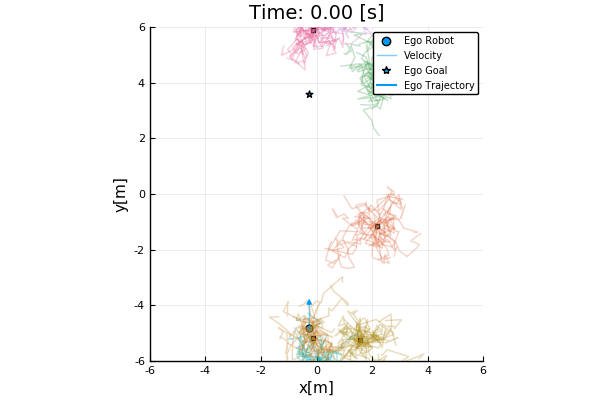

In [65]:
make_gif(result, dtplot=0.1, fps=5, xlim=(-6., 6.), ylim=(-6., 6.), figsize=(600, 400), 
         legendfontsize=7, legend=:topright, markersize=5., filename="drc_synthetic_gaussian.gif",
         show_nominal_trajectory=false)

In [66]:
save("drc_synthetic_gaussian.jld2", "result", result)

Error encountered while save File{DataFormat{:JLD2}, String}("drc_synthetic_gaussian.jld2").

Fatal error:


CapturedException: type DataType has no field mutable
Stacktrace:
  [1] getproperty
    @ ./Base.jl:33 [inlined]
  [2] hasfielddata(T::Any, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:24
  [3] hasdata(T::DataType, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:32
  [4] hasdata
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:30 [inlined]
  [5] odr(#unused#::Type{Main.DistributionallyRobust.DRCEvaluationResult})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:563
  [6] objodr
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:109 [inlined]
  [7] write_dataset
    @ ~/.julia/packages/JLD2/qncOK/src/datasets.jl:541 [inlined]
  [8] write(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/groups.jl:119
  [9] write(f::JLD2.JLDFile{JLD2.MmapIO}, name::String, obj::Main.DistributionallyRobust.DRCEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/JLD2.jl:347
 [10] (::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}})(file::JLD2.JLDFile{JLD2.MmapIO})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:23
 [11] jldopen(::JLD2.var"#62#63"{String, Main.DistributionallyRobust.DRCEvaluationResult, Tuple{}}, ::String, ::Vararg{String}; kws::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:4
 [12] jldopen(::Function, ::String, ::String)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:1
 [13] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:21
 [14] save(::File{DataFormat{:JLD2}, String}, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:17
 [15] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./essentials.jl:729
 [16] invokelatest(::Any, ::Any, ::Vararg{Any})
    @ Base ./essentials.jl:726
 [17] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:219
 [18] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:196
 [19] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Symbol, ::String, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185
 [20] action
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185 [inlined]
 [21] #save#20
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:129 [inlined]
 [22] save(::String, ::String, ::Main.DistributionallyRobust.DRCEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:125
 [23] top-level scope
    @ ~/DRC_Project/DRC_Trajectron/notebook/Eval_Example_10_DRC_Synthetic_Gaussian.ipynb:1